### Упражнение 1
* Реализуйте функцию `get_geodesic_distance`, рассчитывающее геодезическое расстояние между двумя точками в километрах.

In [1]:
# Сигнатура функции и пример вывода:

mipt = Point(55.9297243, 37.5199434) 
kremlin = Point(55.752023, 37.6174994)

get_geodesic_distance(mipt, kremlin)

20.676951995783696

In [2]:
from shapely.geometry import Polygon, Point, LineString
import numpy as np

In [3]:
mipt = Point(55.9297243, 37.5199434) 
kremlin = Point(55.752023, 37.6174994)


In [4]:
def get_geodesic_distance(point1, point2):
    r = 6371.0088
    p1 = Point(point1.x/360*2*np.pi, point1.y/360*2*np.pi) 
    p2 = Point(point2.x/360*2*np.pi, point2.y/360*2*np.pi) 
    
    
    d = 2*r*np.arcsin(np.sqrt(np.sin((p2.x-p1.x)/2)**2 + np.cos(p2.x)*np.cos(p1.x)*np.sin((p2.y-p1.y)/2)**2))
    
    return d

get_geodesic_distance(mipt, kremlin)

20.676980556005404

### Упражнение 2

* Реализуйте функцию `get_k_nearest_neighbours_by_dist`, осуществляющую поиск `k` ближайших соседей полигона из заданного списка на основе геодезического расстояния. Добавьте две возможности учета расстояния: через ближайшие точки на границах полигонов и через центроиды полигонов.

In [5]:
# Сигнатура функции и пример вывода:

big_moscow_districts = gpd.read_file('../data/big_moscow_districts.shp')
polygon = random.sample(big_moscow_districts['geometry'].tolist(), 1)[0]
polygons = random.sample(big_moscow_districts['geometry'].tolist(), 50)

k_nearest_neighbours_by_board = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_board')
k_nearest_neighbours_by_centroid = get_k_nearest_neighbours_by_dist(polygon, polygons, k=10, kind='by_centroid')
k_nearest_neighbours_by_centroid

NameError: name 'gpd' is not defined

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd

In [8]:
big_moscow_districts = gpd.read_file('../data/big_moscow_disticts/big_moscow_districts.shp')

In [73]:
polygon = random.sample(big_moscow_districts['geometry'].tolist(), 1)[0]
polygons = random.sample(big_moscow_districts['geometry'].tolist(), 50)

In [79]:
def get_k_nearest_neighbours_by_dist(polygon,polygons,k,dist_type):
    df = pd.DataFrame()
    df['geometry'] = polygons
    
    if dist_type == 'by_centroid':
        df['dist'] = [get_geodesic_distance(polygon.centroid, i.centroid) for i in df['geometry']]
    
    elif dist_type == 'by_board':
        df['nearest_points'] = [nearest_points(polygon.boundary, i.boundary) for i in df['geometry']]
        df['dist'] = [get_geodesic_distance(i[0], i[1]) for i in df['nearest_points']]
    
    df = df.sort_values('dist', ascending = True)
    
    return gpd.GeoDataFrame(df[:k][['dist','geometry']])

In [80]:
k_nearest_neighbours_by_centroid = get_k_nearest_neighbours_by_dist(polygon,polygons,k = 20,dist_type = 'by_centroid')
k_nearest_neighbours_by_board = get_k_nearest_neighbours_by_dist(polygon,polygons,k = 20,dist_type = 'by_board')

In [81]:
k_nearest_neighbours_by_board

,dist,geometry
22,0.000000,"POLYGON ((37.50350 55.79165, 37.50315 55.79104..."
34,0.346610,"POLYGON ((37.49857 55.72285, 37.49774 55.72250..."
47,0.452834,"MULTIPOLYGON (((37.37720 55.72908, 37.37711 55..."
7,1.522476,"POLYGON ((37.57439 55.79162, 37.57428 55.79158..."
3,2.048370,"POLYGON ((37.52125 55.81730, 37.52076 55.81703..."
11,2.460136,"POLYGON ((37.55923 55.71028, 37.55702 55.70861..."
38,2.989321,"POLYGON ((37.58863 55.79206, 37.58849 55.79167..."
35,3.590619,"POLYGON ((37.46989 55.84318, 37.47035 55.84273..."
18,3.968246,"POLYGON ((37.61174 55.74650, 37.61011 55.74526..."
44,4.776589,"POLYGON ((37.43648 55.87958, 37.43749 55.87989..."


In [82]:
k_nearest_neighbours_by_centroid

,dist,geometry
22,2.678270,"POLYGON ((37.50350 55.79165, 37.50315 55.79104..."
34,4.084734,"POLYGON ((37.49857 55.72285, 37.49774 55.72250..."
3,6.038105,"POLYGON ((37.52125 55.81730, 37.52076 55.81703..."
35,7.281761,"POLYGON ((37.46989 55.84318, 37.47035 55.84273..."
11,8.073245,"POLYGON ((37.55923 55.71028, 37.55702 55.70861..."
44,8.185565,"POLYGON ((37.43648 55.87958, 37.43749 55.87989..."
47,8.747061,"MULTIPOLYGON (((37.37720 55.72908, 37.37711 55..."
7,8.870752,"POLYGON ((37.57439 55.79162, 37.57428 55.79158..."
36,8.946098,"POLYGON ((37.46472 55.88346, 37.46732 55.88379..."
46,9.355321,"POLYGON ((37.52414 55.67367, 37.52009 55.67088..."


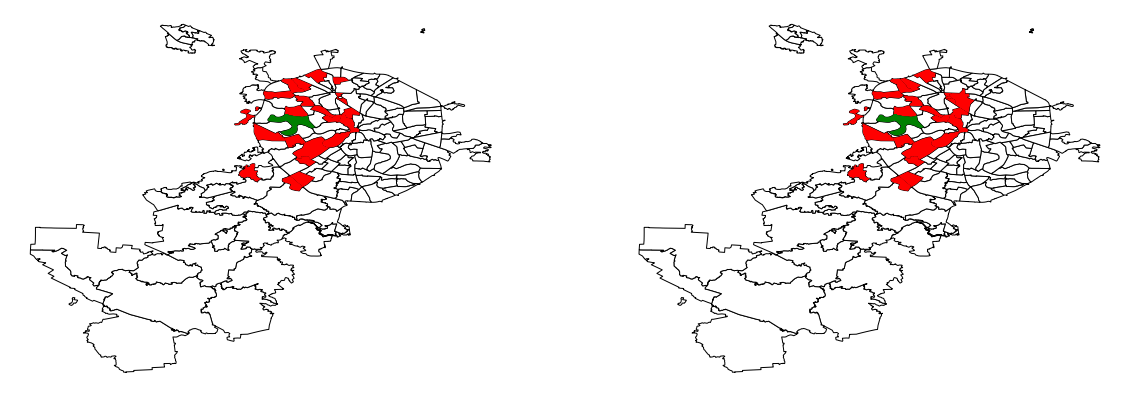

In [83]:
###

fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_centroid.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
big_moscow_districts.plot(ax=ax, color='white', edgecolor='black')
k_nearest_neighbours_by_board.plot(ax=ax, color='red')
gpd.GeoSeries(polygon).plot(ax=ax, color='green')
ax.set_axis_off()

### Упражнение 3 (*)
* Реализуйте функцию `spatial_resample`, выполняющую пространственное агрегирование. 
  На вход функция принимает:
  - `init_polygons` - изначальное гео-разбиение
  - `agg_polygons` - новое гео-разбиение, по которому будет проводится пространственное агрегирование
  - `column` - название столбца количественной переменной в `init_polygons`, которая будет агрегирована  
  - `method` - метод аггрегирования: `sum` - сумма значений, `mean` - среднее значение
  - `kind` - способ аггрегирования при частичном пересечении полигонов из `agg_polygons` и `init_polygons`, `max` - отнести значение в `column` к полигону из `agg_polygons` с которым площадь пересечения максимальна, `prop` - разбить значение в `column` пропорционально площадям пересечений

In [ ]:
# Сигнатура функции и пример вывода:

grid_big_moscow = gpd.read_file('../data/grid_big_moscow.shp')
grid_big_moscow.crs = "EPSG:4326"  
grid_big_moscow['random_value'] = np.random.randint(0, 100, len(grid_big_moscow))

mean_resample_table = spatial_resample(agg_polygons=big_moscow_districts, init_polygons=grid_big_moscow, 
                                       method='mean', column='random_value', kind='max')
sum_resample_table = spatial_resample(agg_polygons=big_moscow_districts, init_polygons=grid_big_moscow, 
                                       method='sum', column='random_value', kind='max')
mean_resample_table.head()

In [ ]:
fig = plt.figure(figsize=(20, 10))
plt.title('Init polygons', fontsize=20)
ax = plt.gca()
grid_big_moscow.plot(ax=ax, column='random_value', cmap='viridis', edgecolor='white', legend=True)
ax.set_axis_off()

In [ ]:
###

fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 2, 1)
plt.title('Spatial resample with sum func', fontsize=20)
sum_resample_table.plot(ax=ax, column='random_value', cmap='viridis', edgecolor='white', legend=True)
ax.set_axis_off()

ax = plt.subplot(1, 2, 2)
plt.title('Spatial resample with mean func', fontsize=20)
mean_resample_table.plot(ax=ax, column='random_value', cmap='viridis', edgecolor='white', legend=True)
ax.set_axis_off()

### Упражнение 4
* Отобразите результаты упражнений 2 и 3 (рисунки с `###`) на интерактивной карте в `Folium`

In [84]:
import folium

In [92]:
# Сохраняем в json файлы

gpd.GeoSeries(polygon).to_file("polygon.geojson", driver='GeoJSON')
k_nearest_neighbours_by_centroid.to_file("k_nearest_neighbours_by_centroid.geojson", driver='GeoJSON')
k_nearest_neighbours_by_board.to_file("k_nearest_neighbours_by_board.geojson", driver='GeoJSON')

## by_centroid

In [94]:
m = folium.Map(location=[55.755826, 37.6172999], # Москва
               zoom_start=10)

with open('polygon.geojson') as json_file:
    polygon_json = json.load(json_file)


with open('k_nearest_neighbours_by_centroid.geojson') as json_file:
    k_nearest_neighbours = json.load(json_file)

m.choropleth(polygon_json, fill_color='green')    
m.choropleth(k_nearest_neighbours, fill_color='red')


m               

E:\Anaconda353\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## by_board

In [96]:
m = folium.Map(location=[55.755826, 37.6172999], # Москва
               zoom_start=10)

with open('polygon.geojson') as json_file:
    polygon_json = json.load(json_file)


with open('k_nearest_neighbours_by_board.geojson') as json_file:
    k_nearest_neighbours = json.load(json_file)

m.choropleth(polygon_json, fill_color='green')    
m.choropleth(k_nearest_neighbours, fill_color='red')


m  

E:\Anaconda353\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
